# Neuroscience 490
## Lesson 3 - Intro to matplotlib
### Content
[Section 1 - Basic Plots](#Section1)<br/>
[Section 2 - Subplots](#Section2)<br/>
[Section 3 - Visualizing Uncertainty](#Section3)
<br/>
<br/><br/><br/>
In this notebook we are going to go over the basics of plotting in Python. There are many different plotting libraries in Python but by far the most popular is matplotlib and that is what we will be going over. Matplotlib is extremely customizable (to a fault) and with that comes serious plotting power. We will be going over how to use fairly basic plotting features today such as scatter plots, line plots, etc, as well as some beautification/customization capabilities.

To get started we an import matplotlib by calling <code>import matplotlib.pyplot as plt</code> ("plt" is the canonical alias, don't use something else). We will also need numpy

<a id='Section1'></a>
### Section 1 - Basic Plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt

It should go without saying that if we want to make a plot we need some data to visualize. This data will almost always take the form of a numpy array but matplotlib can also work with lists, depending on the what you are trying to do.</br></br> Lets try plotting a line. To plot a line in 2d we need to specify the points along the x axis and the corresponding points along the y axis. Recall the equation for a line $ y=mx + b $. Lets generate a numpy array of x-values between 0 and 5, and set a value for m and b to get y-values. Then lets plot them.  To do this we will use the matplotlib plot function by calling <code>plt.plot(xvals, yvals)</code>

x-values: [0. 1. 2. 3. 4. 5.]
y-values: [ 2.  5.  8. 11. 14. 17.]


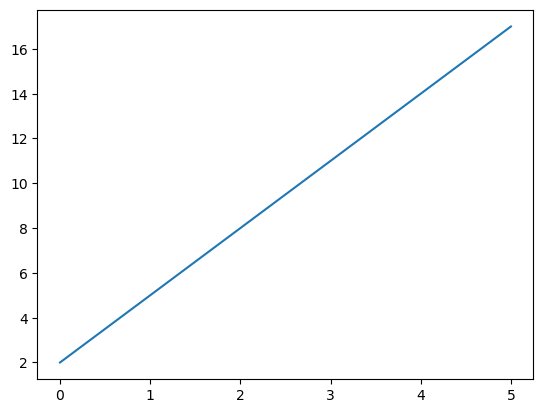

In [3]:
xvals = np.linspace(0, 5, 6)
m = 3
b = 2
yvals = m * xvals + b
print(f'x-values: {xvals}')
print(f'y-values: {yvals}')
plt.plot(xvals, yvals)
plt.show()

By default matplotlib interpolates between the points passed to <code>plt.plot</code> by drawing a line between them. This means that the order or the arrays matters. Look at the plot below to see what I mean

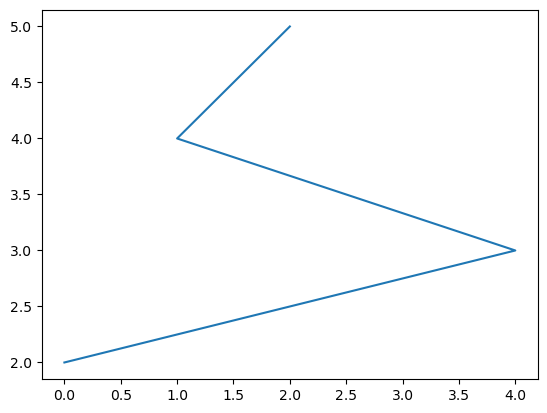

In [4]:
xvals = [0, 4, 1, 2]
yvals = [2, 3, 4, 5]
plt.plot(xvals, yvals)
plt.show()

Let's go back to our first figure and improve it by adding labels and customizing the style of our line. To do this we can call several matplotlib functions that will edit our plot before we call <code>plt.show()</code> to display our plot. The names of these functions should be largely self-explanatory. Feel free to play with them and see how it changes the plot.

x-values: [0. 1. 2. 3. 4. 5.]
y-values: [ 2.  5.  8. 11. 14. 17.]


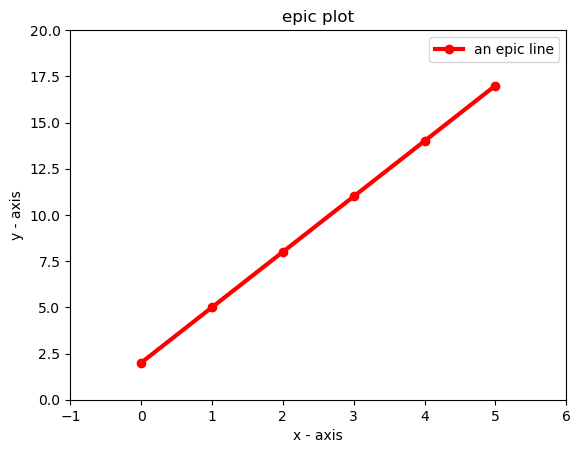

In [5]:
x = np.linspace(0, 5, 6)
m = 3
b = 2
y = m * x + b
print(f'x-values: {x}')
print(f'y-values: {y}')
plt.plot(x, y, marker='o', color='red', lw=3, label='an epic line')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.ylim(bottom=0, top=20)
plt.xlim(left=-1, right=6)
plt.title('epic plot')
plt.legend()
plt.show()

Checkout the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for the function, to see possible markers and linestyles.

### Exercise 1.1
Use numpy to generate the function $y=e^{-x^2}$, and use matplotlib to generate a plot of the function. Have the x-values range include negative values. Please add labels for the axes and the line, a plot title, and choose a linestyle for the line Play with the <code>num</code> parameter of <code>np.linspace</code> and see how it changes the plot.

We can also have multiple lines on the same plot by calling <code>plt.plot()</code> again before displaying.

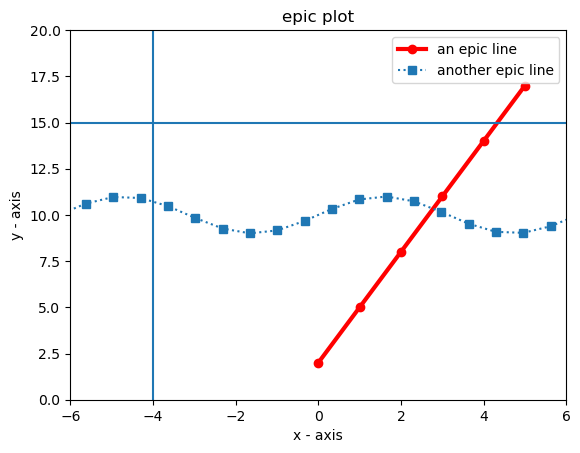

In [6]:
x1 = np.linspace(0, 5, 6)
m = 3
b = 2
y1 = m * x + b

x2 = np.linspace(-2*np.pi, 2*np.pi, 20)
y2 = np.sin(x2) + 10

# Lines
plt.plot(x1, y1, marker='o', color='red', lw=3, label='an epic line')
plt.plot(x2, y2, marker='s', linestyle=':', label='another epic line')
plt.axhline(y=15) # Plots horizontal line
plt.axvline(x=-4) # Plots vertical line

# Beautification
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.ylim(bottom=0, top=20)
plt.xlim(left=-6, right=6)
plt.title('epic plot')
plt.legend()

# Displaying
plt.show()

Matplotlib can plot much more than just lines. For a comprehensive list check out the [matplotlib documentation](https://matplotlib.org/stable/api/pyplot_summary.html). Lets just go over a few that you will frequently use.

A scatter plot takes in x and y positions of points in a plane and places markers at their locations. Unlike <code>plt.plot()</code> matplotlib will not interpolate between points when you call <code>plt.scatter()</code>

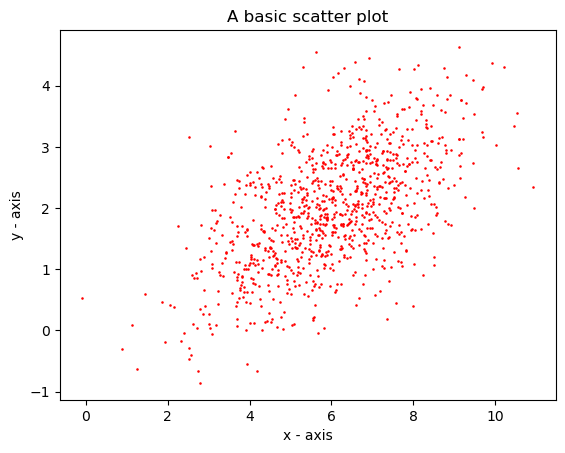

In [7]:
# The below line generates 1000 points from a 2d normal distribution
scatter_points = np.random.multivariate_normal(mean=[6, 2], cov=[[3, 1], [1, 1]], size=1000)

# Get x and y positions by splitting the columns
x_positions = scatter_points[:, 0]
y_positions = scatter_points[:, 1]


plt.scatter(x_positions, y_positions, s=0.7, c='red')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('A basic scatter plot')
plt.show()

Another useful and common plot is a bar chart. To demonstrate bar charts lets plot the averages of the x and y values that we generated above. Lets also add error bars to the bar chart by and set their width to the standard deviation of the x and y values respectively. This function call is a little more complicated but not by much. To start we need to specify the x positions and heights of our bars. Since we are plotting 2 bars we simply set the <code>x</code> parameter to <code>[0, 1]</code>. We set our heights to the values we are comparing, the two means.</br></br>
For the error bar, we specify the x and y positions as well as the y-error size. The x and y positions are the same as for the bar plot, but the y-error parameter is the standard deviation.

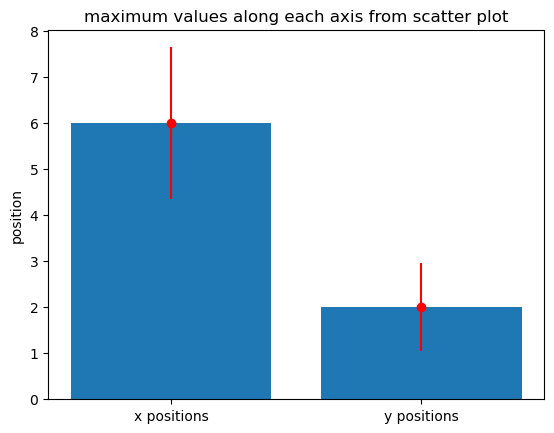

In [8]:
x_mean = x_positions.mean()
x_sd = x_positions.std()
y_mean = y_positions.mean()
y_sd = y_positions.std()


plt.bar(x=[0, 1], height=[x_mean, y_mean])
plt.errorbar(x=[0, 1], y=[x_mean, y_mean], yerr=[x_sd, y_sd], fmt='o', color='red')
plt.xticks(ticks=[0, 1], labels=['x positions', 'y positions'])
plt.ylabel('position')
plt.title('maximum values along each axis from scatter plot')
plt.show()

Another common type of plot is a histogram. To make a histogram we can call the <code>plt.hist()</code> function and pass in the values for whom we want to see the distribution. Lets do this by looking at samples from a normal distribution.

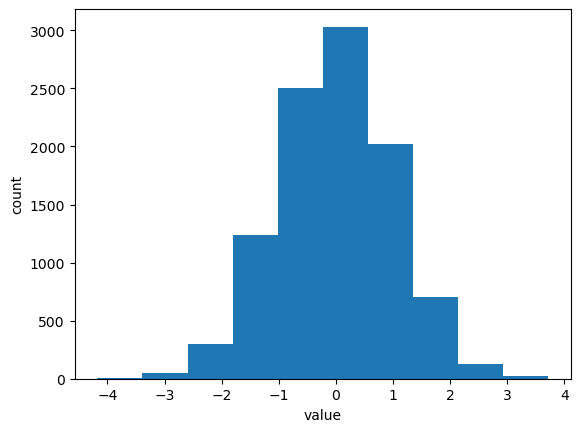

In [9]:
# Generate 10000 points from a normal distribution with mean = 0 and sd = 1
values = np.random.standard_normal(size=10000)
plt.hist(x=values)
plt.ylabel('count')
plt.xlabel('value')
plt.show()

If we want to make our histogram more fine-grained we can change the "bins" parameters in our function call. If we want to plot multiple distributions on the same plot to compare them, we can call <code>plt.hist()</code> twice and use the "alpha" parameter to change their opacities. Additionally, if we want to scale our histogram so that it is a probability density rather than a count, we can set the "density" variable to <code>True</code>.

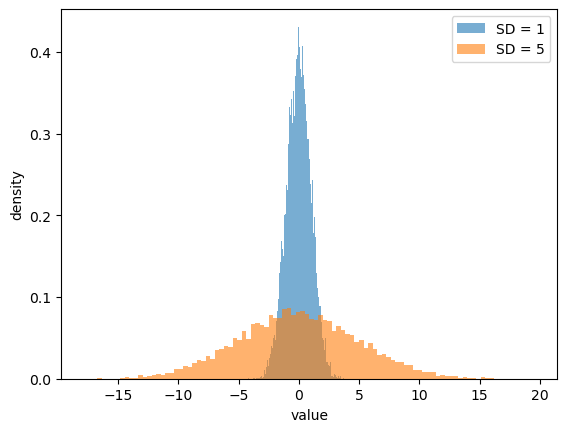

In [10]:
# Generate 10000 points from a normal distribution with mean = 0 and SD = 5
more_values = np.random.normal(loc=0, scale=5, size=10000)

plt.hist(values, bins=100, alpha=0.6, label='SD = 1', density=True)
plt.hist(x=more_values, bins=100, alpha=0.6, label='SD = 5', density=True)
plt.ylabel('density')
plt.xlabel('value')
plt.legend()
plt.show()

Finally, if we want to export a figure as an image, we can call <code>plt.savefig()</code> before <code>plt.show()</code>. If you are working in a Jupyter Notebook, you can also save and/or copy your figure by clicking the floppy disk icon on the right.</br></br>
**A helpful tip**: if you are done making your plot and want to make an image for your lab report, write the line <code>plt.rcParams['figure.dpi'] = 250</code> before you make your plot. This will increase the resolution of your plot. You need not choose 250, just something larger than 100 which is the default.

### Exercise 1.2
Load the numpy array <code>exercise1_2.npy</code> in the Data folder by using <code>np.load()</code>. Use the first row as your x values and make 4 line plots with the rest of the rows. Then in a new cell, calculate the standard deviations of each row and plot them as a bar plot.

In [11]:
# Your code here

Finally, we can visualize a 2-dimenaional arrays as images using the <code>plt.imshow()</code> function.

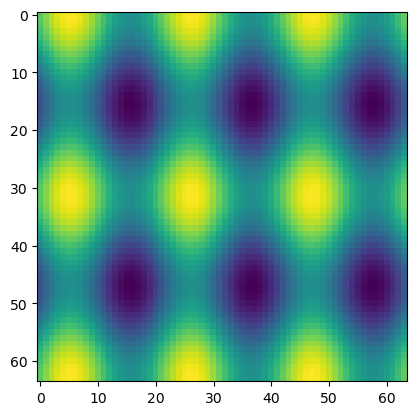

In [46]:
x, y = np.mgrid[:64, :64]
Z = (np.cos(x*0.2) + np.sin(y*0.3))
plt.imshow(Z)

<a id='Section2'></a>
### Section 2 - Subplots

Often times, we will want to make multiple plots on the same figure. To do this we can use matplotlibs subplots functionality by calling <code>plt.subplots()</code>. The first two arguments that <code>plt.subplots()</code> takes define the number of rows and columns of the subplot grid.

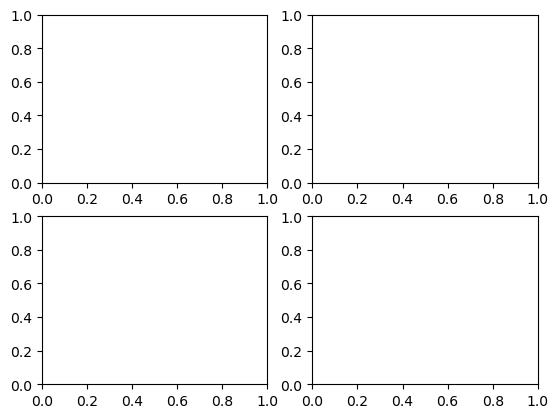

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2)
plt.show()

Under the hood, we just created a 2x2 numpy array and can populate it with plots by indexing the different <code>axes</code> and calling matplotlib functions. Below I am plotting in each subplot a histogram of the 10000 samples we generated from a standard normal before

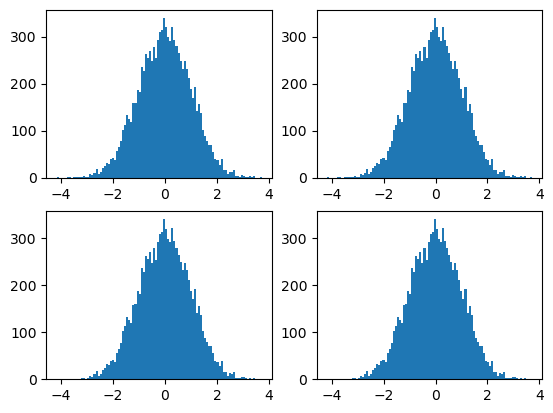

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].hist(values, bins=100)
ax[0, 1].hist(values, bins=100)
ax[1, 0].hist(values, bins=100)
ax[1, 1].hist(values, bins=100)
plt.show()

If we want to change the size of our subplot we can specify the figsize in our function call. We can also call <code>fig.tight_layout()</code> before displaying our plot to make things better spaced.

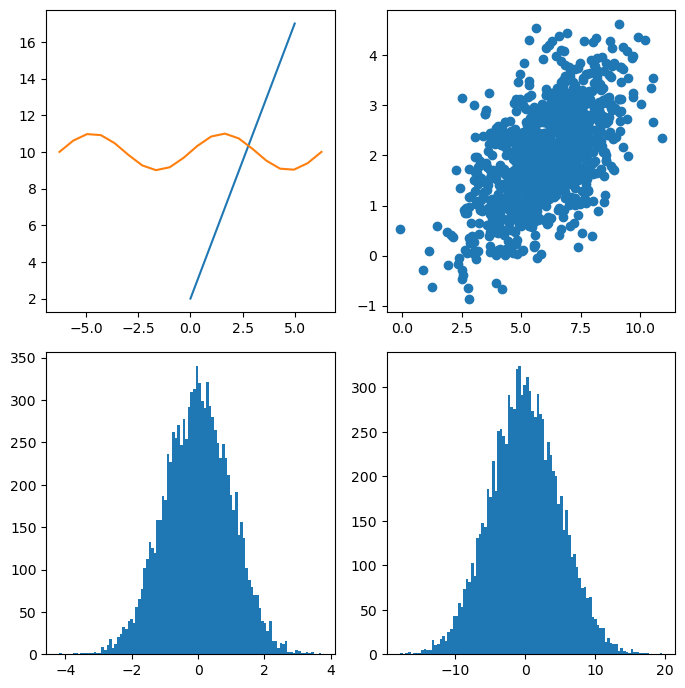

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax[0, 0].plot(x1,y1)
ax[0, 0].plot(x2, y2)
ax[0, 1].scatter(x_positions, y_positions)
ax[1, 0].hist(values, bins=100)
ax[1, 1].hist(more_values, bins=100)
fig.tight_layout()
plt.show()

We have all of the same beautification functionality when working with multiple plots as when working with single plots, however many of the functions require us to write <code>set</code> before the usual function name now. Look at the example below to see what I mean. We can also use <code>fig.suptitle('a title')</code> to specify a title for the sub plots.

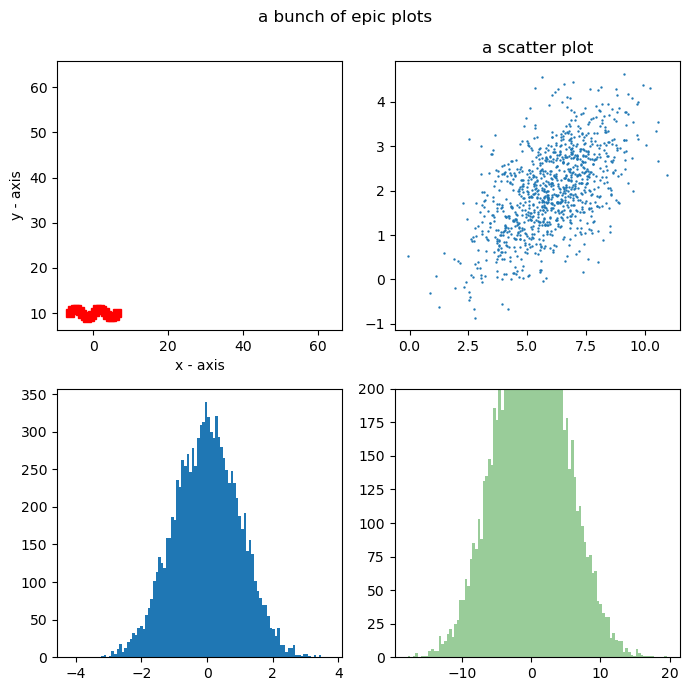

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax[0, 0].plot(x,y)
ax[0, 0].plot(x2, y2, marker='s', linestyle=':', c='r')
ax[0, 0].set_xlabel('x - axis')
ax[0, 0].set_ylabel('y - axis')

ax[0, 1].scatter(x_positions, y_positions, s=0.5)
ax[0, 1].set_title('a scatter plot')
ax[1, 0].hist(values, bins=100)

ax[1, 1].hist(more_values, bins=100, color='green', alpha=0.4)
ax[1, 1].set_ylim(0, 200)
fig.suptitle('a bunch of epic plots')
fig.tight_layout()
plt.show()

### Exercise 2.1
Using the same numpy array as exercise 2.2, plot the rows 1-4 in a 2x2 subplot, using the 0th row as the xvalues. Stylize each line however you would like.

In [17]:
# Your code here

<a id='Section3'></a>
### Section 3 - Visualizing Uncertainty
When dealing with scientific data it is always crucical measure the uncertainty of a statistic. There are many ways to do this including standard deviation, standard error of the mean, and confidence intervals to name a few. For this section we won't be talking about any of those, but instead go over ways to visualize our uncertainty with matplotlib.

To demonstrate doing this lets generate some noisy measurements of a cosine wave, do some ensemble averaging and then plot the standard deviation across our measurements by shading in our region of uncertainty. We'll generate a cosine wave and then add different Gaussian noise to it 50 times to make our data.

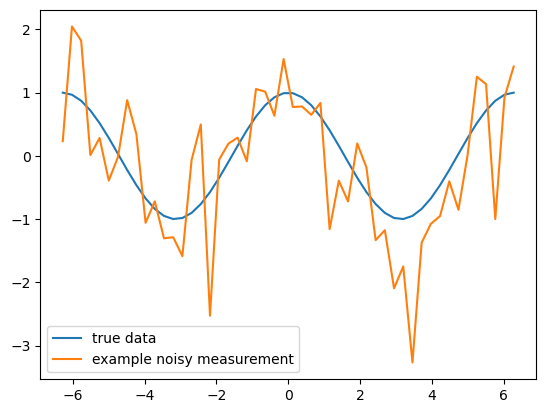

In [18]:
# Generating data
x = np.linspace(-np.pi*2, np.pi*2)
true_data = np.cos(x)
observations = np.zeros(shape=(50, 50))

# Adding noise to the cosine wave
for i in range(50):
    observations[i] = true_data + np.random.normal(0, 0.75, 50)

plt.plot(x, true_data, label='true data')
plt.plot(x, observations[0], label='example noisy measurement')
plt.legend()

In order to visualize our uncertainty we first need to have some statistic for which we can measure the uncertainty. Lets take the ensemble average of our 50 measurements using numpy and also calculate the standard deviation across all of our measurements.
</br>
One common way to visualize uncertainty is via shading. Matplotlib can do this using the <code>plt.fill_between()</code> function. This function works similarly to <code>plt.plot()</code>, first we must define the x values of our plot, and then the region we'd like to be shaded, first by passing the lower bound and then the upper bound. It is also important to set the <code>alpha</code> parameter of the function to be less than 1. This controls the opacity of the shading.

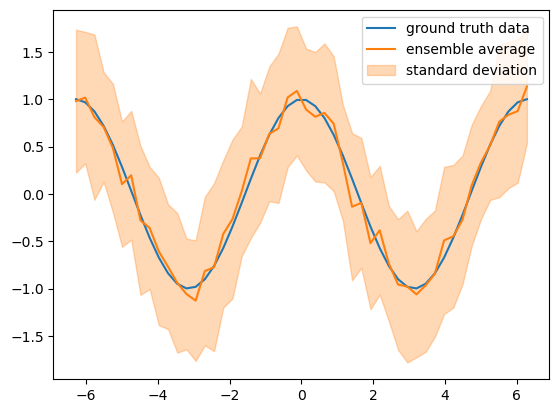

In [19]:
ensemble_average = observations.mean(0)
ensemble_std = observations.std(0)

plt.plot(x, true_data, label='ground truth data')
plt.plot(x, observations.mean(0), label='ensemble average')
plt.fill_between(x, observations.mean(0) - observations.std(0), observations.mean(0) + observations.std(0), alpha=0.3, color='C1', label='standard deviation')
plt.legend()

The <code>plt.fillbetween()</code> function need not only be used for demarcating regions of uncertainty, and can be used to shade in any region of the figure you would like. If you'd like to highlight a horizontal region, simply use the <code>plt.filbetweenx()</code> function instead.

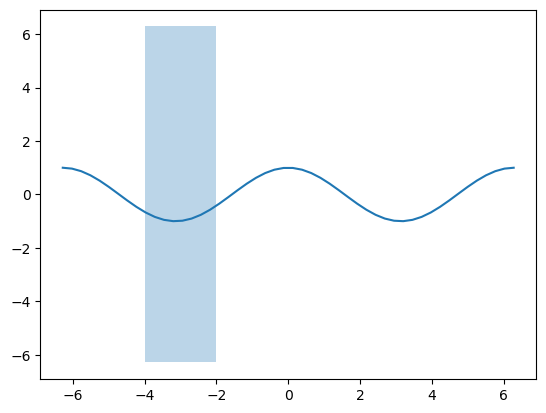

In [20]:
plt.plot(x, true_data)
plt.fill_betweenx(x, -4, -2, alpha=0.3)

Finally, we can also visualize uncertainty using error bars at every point rather than shaded regions. For this example, it may not be the most helpful because of the amount of data points, but lets go over the <code>plt.errorbar()</code> function so that you can use it when you have a good use case.</br>
To use the function, simply pass in your x/y values and set the <code>yerr</code> argument to your array of standard deviations or whatever other measurement is appropriate.

TypeError: bad operand type for unary -: 'builtin_function_or_method'

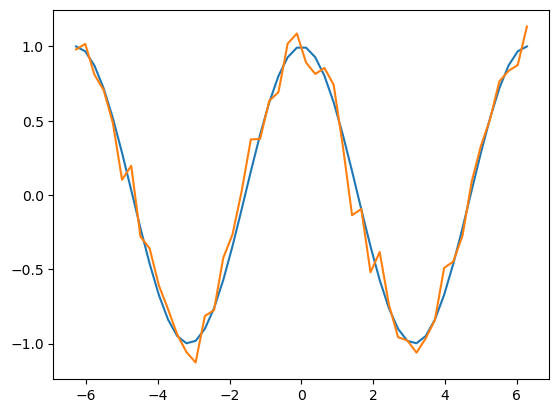

In [21]:
plt.plot(x, true_data, label='ground truth data')
plt.errorbar(x, observations.mean(0),yerr=observations.std)